In [1]:
import os
from glob import glob
import random
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

Button

In [1]:
test_type = 'opt'
base_path = f'[USER_PATH]\\ArtificialVision'
base_path = 'C:\\Users\\Na Min An\\Desktop\\Development\\ArtificialVision'

num_class = 16
if test_type == 'opt':
  sel_ppl = list(range(300, 309)) + list(range(400, 408)) + [611]
elif test_type == 'elec': # check
  sel_ppl = [499, 500] + list(range(502, 509)) + list(range(601, 607)) + list(range(608, 611)) # 18 subjects

quesdata_files = glob(f'{base_path}\\data\\Question_Banks_AI_Hub_final\\{num_class}classes\\set0\\*')
humdata_path = glob(f'{base_path}\\data\\Human_Expert\\211202')[0]
humsub_path = glob(f'{base_path}\\data\\210827_ANNA_Removing_uncontaminated_data.csv')[0]
answer_path = glob(f'{base_path}\\data\\211105_QAs_for_Set0_CNN_SVC_4classes_partial.csv')[0]
testdata_path = glob(f'{base_path}\\data\\sample_for_dev_test_{test_type}')[0]
fig_path = glob(f'{base_path}\\figures')[0]

NameError: name 'glob' is not defined

Human Data

In [ ]:
human_df = pd.DataFrame()
n = 9
for i in range(1, 80*n+1, 80):
    try:
      j = i+79
      temp_df = pd.read_csv(os.path.join(humdata_path, f'main_test({i}_{j}).csv'))
      if i == 1:
        pass
      else:
        temp_df = temp_df.rename(columns = {'유저식별아이디':'useless', 'MC구분':'useless', '성별':'useless', '나이':'useless', '학력':'useless'})
      human_df = pd.concat([human_df, temp_df], axis=1)
    except:
      print(i)

human_df = human_df[human_df['유저식별아이디'].isin(sel_ppl)]
orig_human_df = human_df
orig_human_df

,유저식별아이디,나이,성별,학력,시력,참여일자,MC구분,선택_A_1,시간_A_1,확신_1,...,선택_A_719,시간_A_719,확신_719,선택_B_719,시간_B_719,선택_A_720,시간_A_720,확신_720,선택_B_720,시간_B_720
73,500.0,24.0,1.0,고졸,1.0,2021-12-01 10:10,4,NaN,0.00,NaN,...,19081632.0,2.16,1.0,NaN,0.00,19071131.0,1.57,1.0,NaN,0.0
74,502.0,22.0,2.0,고졸,0.0,2021-12-01 10:11,5,NaN,0.00,NaN,...,19081632.0,0.22,1.0,NaN,0.00,19071131.0,1.93,1.0,NaN,0.0
76,499.0,20.0,2.0,고졸,0.0,2021-12-01 10:26,6,19082032.0,4.99,1.0,...,19081632.0,1.89,1.0,NaN,0.00,19071131.0,1.43,1.0,NaN,0.0
77,505.0,30.0,2.0,대졸,0.0,2021-12-01 13:04,5,19070311.0,2.61,NaN,...,19081632.0,1.84,1.0,NaN,0.00,19071131.0,1.61,1.0,NaN,0.0
78,503.0,24.0,2.0,대졸,0.0,2021-12-01 13:07,6,19070311.0,3.85,NaN,...,19092521.0,2.85,1.0,NaN,0.00,19071131.0,0.34,1.0,NaN,0.0
79,504.0,26.0,2.0,석사,0.0,2021-12-01 13:08,4,NaN,0.00,NaN,...,19081632.0,1.94,NaN,19092521.0,0.63,19071131.0,2.32,1.0,NaN,0.0
80,508.0,26.0,2.0,석사,0.0,2021-12-01 16:12,4,NaN,0.00,NaN,...,19081632.0,1.35,1.0,NaN,0.00,19071131.0,1.66,1.0,NaN,0.0
81,506.0,24.0,2.0,대졸,0.0,2021-12-01 16:13,5,NaN,0.00,NaN,...,19081632.0,0.16,1.0,NaN,0.00,NaN,0.00,NaN,NaN,0.0
82,507.0,23.0,2.0,고졸,0.0,2021-12-01 16:14,6,NaN,0.00,NaN,...,19081632.0,1.50,1.0,NaN,0.00,19071131.0,2.40,1.0,NaN,0.0
83,602.0,24.0,2.0,대졸,0.0,2021-12-02 10:14,4,19071821.0,2.47,1.0,...,19092521.0,0.94,1.0,NaN,0.00,19071131.0,0.30,1.0,NaN,0.0


Answer Data

In [ ]:
answer_df = pd.read_csv(answer_path)

act_per_list, pix_list, gs_list, par_list = [], [], [], []
for answer in answer_df['Answer']:
    img, _ = answer.split('.jpg')
    act_per, pix, gs, par = img.split('_')
    
    act_per_list.append(act_per)
    pix_list.append(pix)
    gs_list.append(gs)
    par_list.append(par)

answer_df['act_per'] = act_per_list
answer_df['PIX'] = pix_list
answer_df['GS'] = gs_list
answer_df['par'] = par_list

answer_df = answer_df[:80*n]
answer_df = answer_df.T

orig_answer_df = answer_df
answer_df

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
Answer,19070311_16PIX_8GS_S001L1E03C7.jpg,19080133_32PIX_4GS_S001L1E03C7.jpg,19090222_32PIX_8GS_S001L1E01C4.jpg,19090631_16PIX_2GS_S001L1E03C7.jpg,19072221_32PIX_2GS_S001L1E01C4.jpg,19072221_64PIX_4GS_S001L1E03C7.jpg,19081632_64PIX_2GS_S001L1E03C7.jpg,19092711_64PIX_8GS_S001L1E02C7.jpg,19070522_16PIX_4GS_S001L1E03C7.jpg,19081421_32PIX_2GS_S001L1E01C7.jpg,...,19090631_32PIX_8GS_S001L1E01C7.jpg,19070231_64PIX_4GS_S001L1E03C7.jpg,19090222_16PIX_4GS_S001L1E03C7.jpg,19080133_32PIX_8GS_S001L1E01C7.jpg,19081421_32PIX_2GS_S001L1E01C4.jpg,19072221_16PIX_8GS_S001L1E01C7.jpg,19082131_16PIX_2GS_S001L1E01C7.jpg,19092521_32PIX_4GS_S001L1E01C7.jpg,19081632_64PIX_2GS_S001L1E01C7.jpg,19071131_64PIX_8GS_S001L1E01C7.jpg
MC1,"[19090631, 19070311, 19082032, 19071821]","[19090631, 19090222, 19070522, 19080133]","[19072922, 19071821, 19090222, 19070231]","[19070522, 19090222, 19080133, 19090631]","[19070231, 19070311, 19092521, 19072221]","[19082131, 19072221, 19070311, 19070522]","[19082032, 19081632, 19071131, 19092711]","[19092711, 19070231, 19082032, 19070311]","[19092521, 19072922, 19070311, 19070522]","[19081421, 19071131, 19081632, 19072922]",...,"[19081632, 19080133, 19090631, 19092711]","[19070231, 19080133, 19072922, 19071821]","[19081632, 19092711, 19070231, 19090222]","[19072922, 19072221, 19080133, 19090631]","[19082032, 19072221, 19090631, 19081421]","[19070231, 19092521, 19072221, 19080133]","[19092711, 19090631, 19082131, 19092521]","[19092521, 19070231, 19082131, 19090631]","[19092521, 19081632, 19070231, 19070522]","[19081421, 19090222, 19071131, 19082032]"
MC1_hit_rate,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
MC2,"[19070311, 19071131, 19082131, 19070522]","[19081632, 19080133, 19071821, 19082032]","[19090222, 19081421, 19070311, 19070522]","[19090631, 19070231, 19090222, 19072221]","[19072922, 19071821, 19072221, 19081632]","[19092711, 19072922, 19072221, 19090631]","[19072922, 19082131, 19081632, 19080133]","[19071821, 19082131, 19092711, 19080133]","[19081421, 19070522, 19072221, 19081632]","[19072221, 19080133, 19070522, 19081421]",...,"[19071821, 19070231, 19092521, 19090631]","[19070231, 19081421, 19092521, 19072221]","[19090631, 19090222, 19071131, 19092711]","[19081632, 19072221, 19092521, 19080133]","[19081421, 19071131, 19072922, 19092711]","[19081421, 19092711, 19072221, 19071131]","[19090222, 19070231, 19082131, 19080133]","[19071821, 19081632, 19092521, 19072922]","[19082032, 19081632, 19071821, 19090222]","[19081632, 19082032, 19071131, 19092711]"
MC2_hit_rate,1.0,1.0,1.0,1.0,1.0,1.0,0.888889,1.0,1.0,0.111111,...,0.0,1.0,1.0,1.0,0.888889,1.0,0.888889,0.888889,1.0,1.0
MC3,"[19070311, 19092711, 19082032, 19090222]","[19080133, 19081421, 19071131, 19070231]","[19090222, 19071821, 19082032, 19082131]","[19070311, 19071131, 19090631, 19080133]","[19070522, 19092521, 19072922, 19072221]","[19071821, 19090222, 19090631, 19072221]","[19092711, 19070311, 19081632, 19071821]","[19092711, 19082032, 19090222, 19080133]","[19071131, 19082032, 19070231, 19070522]","[19082032, 19090631, 19081421, 19092521]",...,"[19080133, 19081421, 19090631, 19070231]","[19071821, 19070231, 19082131, 19092711]","[19090222, 19071821, 19090631, 19071131]","[19072221, 19080133, 19071131, 19070231]","[19081421, 19071821, 19070522, 19072922]","[19090631, 19082032, 19072221, 19071821]","[19081632, 19082131, 19092521, 19092711]","[19081632, 19070231, 19092521, 19081421]","[19070522, 19071131, 19081632, 19070311]","[19072922, 19071821, 19070231, 19071131]"
MC3_hit_rate,0.111111,0.0,0.888889,0.222222,0.0,0.888889,0.0,0.666667,0.111111,0.0,...,0.0,1.0,0.444444,0.333333,0.0,0.333333,0.0,0.0,0.222222,0.888889
act_per,19070311,19080133,19090222,19090631,19072221,19072221,19081632,19092711,19070522,19081421,...,19090631,19070231,19090222,19080133,19081421,19072221,19082131,19092521,19081632,19071131
PIX,16PIX,32PIX,32PIX,16PIX,32PIX,64PIX,64PIX,64PIX,

Preprocessed Human Data

In [ ]:
human_df = orig_human_df.copy()
human_df = human_df.fillna(0)
human_df['유저식별아이디'] = human_df['유저식별아이디'].astype(int)
human_df.index = human_df['유저식별아이디']

sel_col = []
for (i, col) in enumerate(human_df.columns):
    split = col.split('_')
    if split[0] == '선택' and split[1] == 'A':
        sel_col.append(col)
    
acc_df = human_df[sel_col]
acc_df.columns = [n for n in range(acc_df.shape[1])]
acc_df = acc_df.astype(int)

for q in range(acc_df.shape[1]):
    act_per = answer_df.loc['act_per'][q] 
    for s in range(acc_df.shape[0]):
        pred_per = acc_df.iloc[s, q]
        try:
            if str(int(pred_per)) == str(int(act_per)):
                acc_df.iloc[s, q] = 1
            else:
                acc_df.iloc[s, q] = 0
        except:
            acc_df.iloc[s, q] = 0

acc_df.columns = answer_df.T['Answer']
acc_df

Answer,19070311_16PIX_8GS_S001L1E03C7.jpg,19080133_32PIX_4GS_S001L1E03C7.jpg,19090222_32PIX_8GS_S001L1E01C4.jpg,19090631_16PIX_2GS_S001L1E03C7.jpg,19072221_32PIX_2GS_S001L1E01C4.jpg,19072221_64PIX_4GS_S001L1E03C7.jpg,19081632_64PIX_2GS_S001L1E03C7.jpg,19092711_64PIX_8GS_S001L1E02C7.jpg,19070522_16PIX_4GS_S001L1E03C7.jpg,19081421_32PIX_2GS_S001L1E01C7.jpg,...,19090631_32PIX_8GS_S001L1E01C7.jpg,19070231_64PIX_4GS_S001L1E03C7.jpg,19090222_16PIX_4GS_S001L1E03C7.jpg,19080133_32PIX_8GS_S001L1E01C7.jpg,19081421_32PIX_2GS_S001L1E01C4.jpg,19072221_16PIX_8GS_S001L1E01C7.jpg,19082131_16PIX_2GS_S001L1E01C7.jpg,19092521_32PIX_4GS_S001L1E01C7.jpg,19081632_64PIX_2GS_S001L1E01C7.jpg,19071131_64PIX_8GS_S001L1E01C7.jpg
유저식별아이디,,,,,,,,,,,,,,,,,,,,,
500,0,1,0,1,0,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,1
502,0,1,0,1,0,0,0,1,0,0,...,1,1,0,1,1,0,0,1,1,1
499,0,1,1,0,1,0,0,1,0,0,...,0,1,1,1,0,1,0,0,1,1
505,1,0,0,1,0,1,1,0,0,0,...,1,1,0,1,0,0,1,0,1,1
503,1,0,0,0,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,0,1
504,0,0,1,1,0,1,1,1,0,1,...,1,1,1,1,0,0,0,0,1,1
508,0,0,1,0,0,0,0,1,0,0,...,0,1,1,1,0,1,0,1,1,1
506,0,1,1,0,0,1,0,1,0,1,...,1,1,1,1,1,0,1,1,1,0
507,0,0,0,1,0,1,1,1,0,1,...,0,1,0,1,1,0,0,1,1,1


Machine Data

In [23]:
model_type1_list = [''] #['PCA', 'PCA', '', '']
model_type2_list = ['CNN_SVC'] #['SVC', 'LR', 'CNN_LR', 'CNN_SVC']
seed_list = [22, 77, 2, 100, 81, 42, 7, 1, 55, 50] 
pix_order_list = ['16PIX', '24PIX', '32PIX', '64PIX', '128PIX']
gs_order_list = ['2GS', '4GS', '6GS', '8GS', '16GS']

df = pd.read_csv(humsub_path)
l = list(range(df.shape[0]))
n = 16
random.seed(22)
set_1 = random.sample(l, n)
sets = [set_1]


for (model_type1, model_type2) in zip(model_type1_list, model_type2_list): # 제일 첫 번째 model에 대해서만
    model_type = model_type1 + model_type2
    input_folder = [df.iloc[i, 0] for i in sets[0]] 
    assert len(input_folder) == 16
    com_obj = itertools.combinations(input_folder, 16)
    com_list = list(com_obj)

    mac_df = pd.DataFrame()
    for i in range(len(quesdata_files)):
        data_path = quesdata_files[i]
        seed = int(os.path.basename(data_path).split('d')[-1])

        for n in range(len(os.listdir(data_path))):
            print(seed, n)

            preprocessed_data_path =  os.path.join(data_path, f'comb{n}') 
            high_analysis_path = os.path.join(preprocessed_data_path, f'High_Analysis_{test_type}')
            
            add_high_df = pd.read_csv(os.path.join(high_analysis_path, f'High_Level_Data_Analysis_{model_type1}_{model_type2}.csv'))
            add_high_df['Hit Rate'] = add_high_df['correctness'].replace(['correct', 'wrong'], [1, 0]) 
            add_high_df = add_high_df[['file_name', 'actual_person', 'Hit Rate']]
            add_high_df['actual_person'] = add_high_df['actual_person'].astype(int)
            
            img_list, hyperpar_list, par_list = [], [], []
            for i in range(add_high_df.shape[0]):
                file_name = add_high_df['file_name'][i].split('.')[0]
                pix, gs, par = file_name.split('_')
                per = add_high_df['actual_person'][i]
                img = str(per) + '_' + str(pix) + '_' + str(gs) + '_' + str(par) + '.jpg'
                img_list.append(img)
                hyperpar_list.append(str(pix) + '_' + str(gs))
                par_list.append(str(par))
            add_high_df['img'] = img_list
            add_high_df['hyperpar'] = hyperpar_list
            add_high_df['par'] = par_list
            
            add_high_df = add_high_df[['img', 'hyperpar', 'par', 'Hit Rate']]
        
        add_high_df['Seed'] = [seed] * add_high_df.shape[0]
        
        mac_df = pd.concat([mac_df, add_high_df], axis=0)

new_hyperpar_name_list = ['16PIX_2GS', '16PIX_4GS', '16PIX_8GS', 
                          '32PIX_2GS', '32PIX_4GS', '32PIX_8GS',  
                          '64PIX_2GS', '64PIX_4GS', '64PIX_8GS']
par_list = ['S001L1E01C4', 'S001L1E01C7', 'S001L1E01C10',
             'S001L1E02C7',
            'S001L1E03C7']
mac_df = mac_df[mac_df['hyperpar'].isin(new_hyperpar_name_list)]
mac_df = mac_df[mac_df['par'].isin(par_list)]

mac_df = mac_df.pivot(index='Seed', columns='img', values='Hit Rate')

mac_df

1 0
100 0
2 0
22 0
42 0
50 0
55 0
7 0
77 0
81 0


img,19070231_16PIX_2GS_S001L1E01C10.jpg,19070231_16PIX_2GS_S001L1E01C4.jpg,19070231_16PIX_2GS_S001L1E01C7.jpg,19070231_16PIX_2GS_S001L1E02C7.jpg,19070231_16PIX_2GS_S001L1E03C7.jpg,19070231_16PIX_4GS_S001L1E01C10.jpg,19070231_16PIX_4GS_S001L1E01C4.jpg,19070231_16PIX_4GS_S001L1E01C7.jpg,19070231_16PIX_4GS_S001L1E02C7.jpg,19070231_16PIX_4GS_S001L1E03C7.jpg,...,19092711_64PIX_4GS_S001L1E01C10.jpg,19092711_64PIX_4GS_S001L1E01C4.jpg,19092711_64PIX_4GS_S001L1E01C7.jpg,19092711_64PIX_4GS_S001L1E02C7.jpg,19092711_64PIX_4GS_S001L1E03C7.jpg,19092711_64PIX_8GS_S001L1E01C10.jpg,19092711_64PIX_8GS_S001L1E01C4.jpg,19092711_64PIX_8GS_S001L1E01C7.jpg,19092711_64PIX_8GS_S001L1E02C7.jpg,19092711_64PIX_8GS_S001L1E03C7.jpg
Seed,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2,1,0,1,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
7,1,0,0,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
22,0,0,0,0,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
42,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
50,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
55,1,0,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
77,0,0,0,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
81,1,0,0,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1


Merged Data

In [27]:
mac_df

img,19070231_16PIX_2GS_S001L1E01C10.jpg,19070231_16PIX_2GS_S001L1E01C4.jpg,19070231_16PIX_2GS_S001L1E01C7.jpg,19070231_16PIX_2GS_S001L1E02C7.jpg,19070231_16PIX_2GS_S001L1E03C7.jpg,19070231_16PIX_4GS_S001L1E01C10.jpg,19070231_16PIX_4GS_S001L1E01C4.jpg,19070231_16PIX_4GS_S001L1E01C7.jpg,19070231_16PIX_4GS_S001L1E02C7.jpg,19070231_16PIX_4GS_S001L1E03C7.jpg,...,19092711_64PIX_4GS_S001L1E01C10.jpg,19092711_64PIX_4GS_S001L1E01C4.jpg,19092711_64PIX_4GS_S001L1E01C7.jpg,19092711_64PIX_4GS_S001L1E02C7.jpg,19092711_64PIX_4GS_S001L1E03C7.jpg,19092711_64PIX_8GS_S001L1E01C10.jpg,19092711_64PIX_8GS_S001L1E01C4.jpg,19092711_64PIX_8GS_S001L1E01C7.jpg,19092711_64PIX_8GS_S001L1E02C7.jpg,19092711_64PIX_8GS_S001L1E03C7.jpg
Seed,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2,1,0,1,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
7,1,0,0,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
22,0,0,0,0,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
42,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
50,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
55,1,0,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
77,0,0,0,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
81,1,0,0,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
mer_df = pd.concat([acc_df, mac_df], join='inner')
mer_df = mer_df[mer_df.index != 'img']
mer_df = mer_df.transpose()

par_lst = []
for file_name in mer_df.index:
    split = file_name.split('.')
    face, pix, gs, par = split[0].split('_')
    par_lst.append(f'{pix}_{gs}')

mer_df['par'] = par_lst

temp_df = mer_df.groupby('par').mean()
temp_df.columns = ['human'] * len(sel_ppl) + ['machine'] * len(quesdata_files)
temp_df = temp_df.stack().reset_index()

temp_df.columns = ['par', 'model', 'hit_rate']
temp_df = temp_df[['par', 'model', 'hit_rate']]
temp_df

,par,model,hit_rate
0,16PIX_2GS,human,0.3750
1,16PIX_2GS,human,0.2500
2,16PIX_2GS,human,0.4375
3,16PIX_2GS,human,0.1750
4,16PIX_2GS,human,0.3375
...,...,...,...
247,64PIX_8GS,machine,0.8750
248,64PIX_8GS,machine,0.8750
249,64PIX_8GS,machine,0.8250
250,64PIX_8GS,machine,0.8125


Results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

64PIX_8GS_human v.s. 64PIX_8GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.160e+02
16PIX_4GS_human v.s. 16PIX_4GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.388e-03 U_stat=1.610e+02
16PIX_2GS_human v.s. 16PIX_2GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.902e-04 U_stat=1.790e+02
16PIX_8GS_human v.s. 16PIX_8GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.045e-03 U_stat=1.635e+02
32PIX_2GS_human v.s. 32PIX_2GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.892e-03 U_stat=1.655e+02
32PIX_4GS_human v.s. 32PIX_4GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.026e-03 U_stat=1.590e+02
32PIX_8G

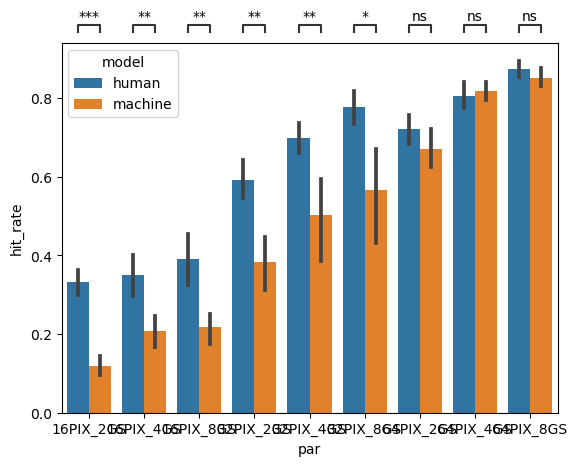

In [30]:

box_pairs=[
        (("16PIX_2GS", "human"), ("16PIX_2GS", "machine")),
        (("16PIX_4GS", "human"), ("16PIX_4GS", "machine")),
        (("16PIX_8GS", "human"), ("16PIX_8GS", "machine")),
        (("32PIX_2GS", "human"), ("32PIX_2GS", "machine")),
        (("32PIX_4GS", "human"), ("32PIX_4GS", "machine")),
        (("32PIX_8GS", "human"), ("32PIX_8GS", "machine")),
        (("64PIX_2GS", "human"), ("64PIX_2GS", "machine")),
        (("64PIX_4GS", "human"), ("64PIX_4GS", "machine")),
        (("64PIX_8GS", "human"), ("64PIX_8GS", "machine")),
    ]
plot = sns.barplot(data=temp_df,
                   x='par',
                   y='hit_rate',
                   hue='model')
plot, test_results = add_stat_annotation(plot,
                                         data=temp_df,
                                         x='par',
                                         y='hit_rate',
                                         hue='model',
                                         box_pairs=box_pairs,
                                         test='Mann-Whitney', text_format='star', loc='outside', verbose=1)
plt.show()

In [31]:
temp_df.to_csv(os.path.join(fig_path, f'parallel_{test_type}_{model_type}_{num_class}.csv'))